<a href="https://colab.research.google.com/github/MazenWaleed320/AI-Agent-Surveys/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mazen Waleed Samier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (6,4)

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris (2).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df['Species_name'] = encoder.inverse_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_name
0,1,5.1,3.5,1.4,0.2,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,0,Iris-setosa


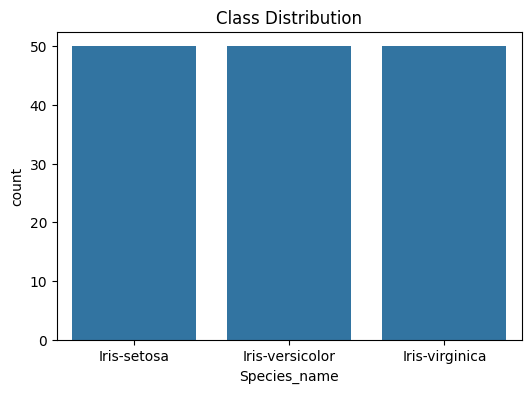

In [ ]:
plt.figure()
sns.countplot(x='Species_name', data=df)
plt.title("Class Distribution")
plt.show()

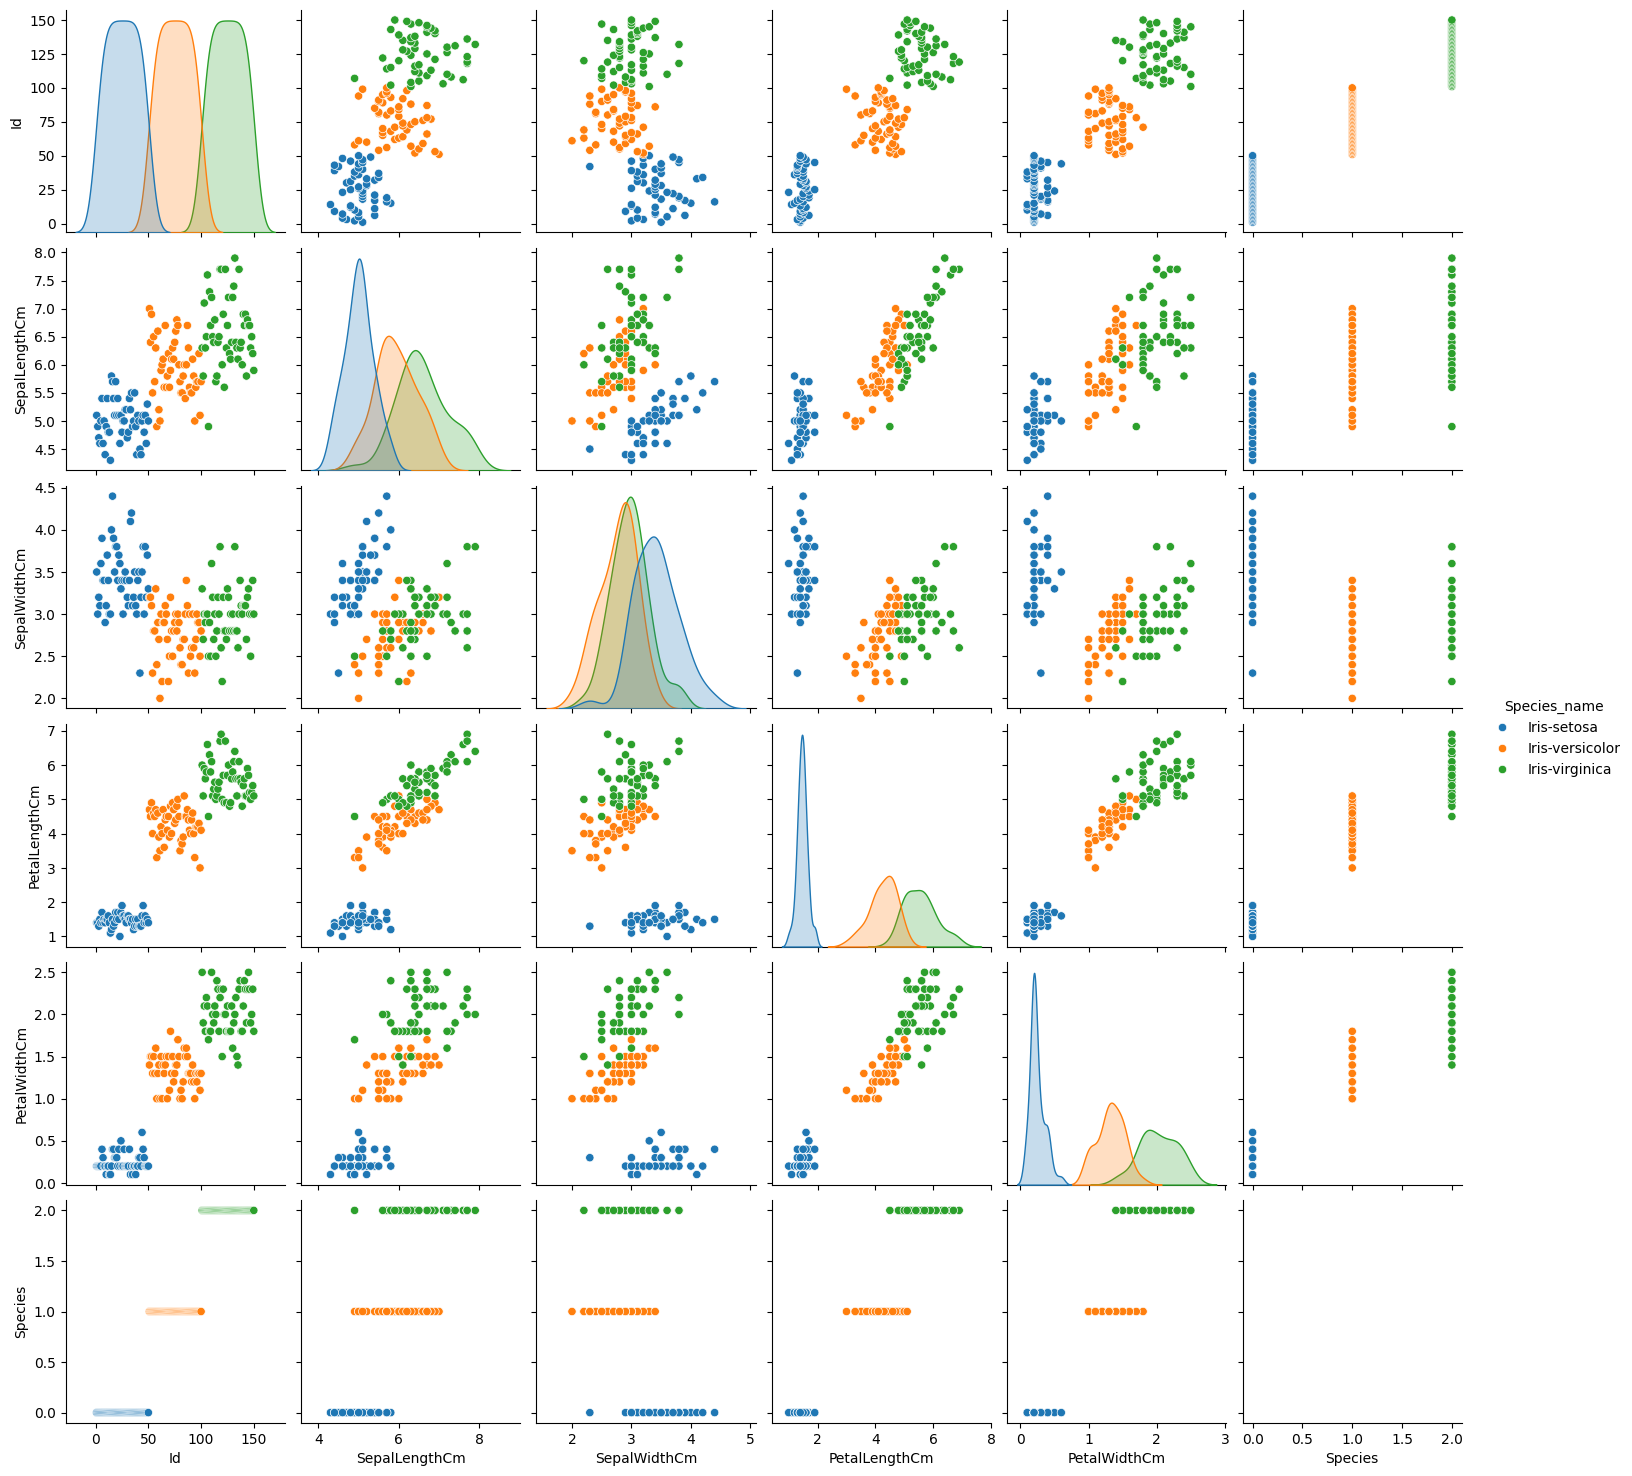

In [ ]:
sns.pairplot(df, hue='Species_name')
plt.show()

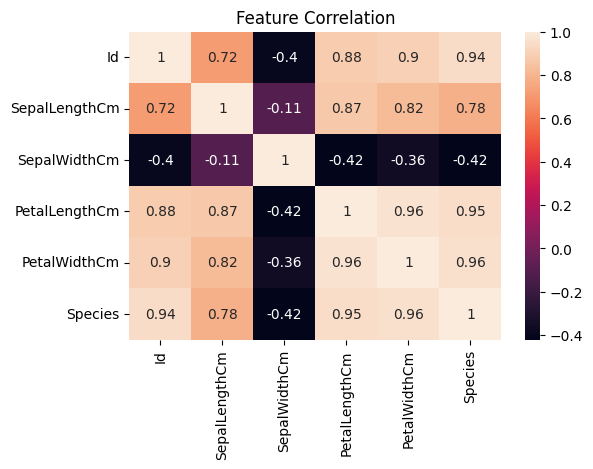

In [ ]:
plt.figure()
sns.heatmap(df.drop(['Species_name'], axis=1).corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

In [ ]:
df['Petal_Ratio'] = df['PetalLengthCm'] / df['PetalWidthCm']
df['Sepal_Ratio'] = df['SepalLengthCm'] / df['SepalWidthCm']

df['Petal_Area'] = df['PetalLengthCm'] * df['PetalWidthCm']
df['Sepal_Area'] = df['SepalLengthCm'] * df['SepalWidthCm']

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_name,Petal_Ratio,Sepal_Ratio,Petal_Area,Sepal_Area
0,1,5.1,3.5,1.4,0.2,0,Iris-setosa,7.0,1.457143,0.28,17.85
1,2,4.9,3.0,1.4,0.2,0,Iris-setosa,7.0,1.633333,0.28,14.70
2,3,4.7,3.2,1.3,0.2,0,Iris-setosa,6.5,1.468750,0.26,15.04
3,4,4.6,3.1,1.5,0.2,0,Iris-setosa,7.5,1.483871,0.30,14.26
4,5,5.0,3.6,1.4,0.2,0,Iris-setosa,7.0,1.388889,0.28,18.00


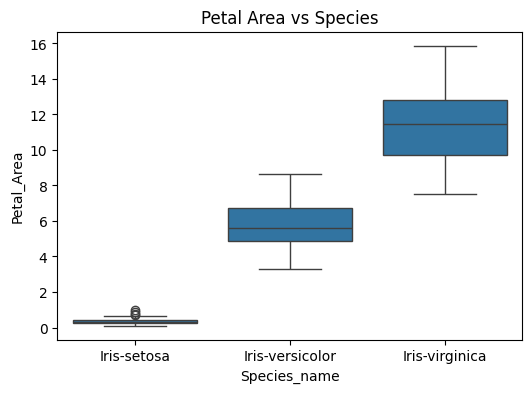

In [ ]:
plt.figure()
sns.boxplot(x='Species_name', y='Petal_Area', data=df)
plt.title("Petal Area vs Species")
plt.show()

In [ ]:
X = df.drop(['Species','Species_name'], axis=1).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def one_hot(y):
    yOH = np.zeros((len(y), 3))
    for i, val in enumerate(y):
        yOH[i,val] = 1
    return yOH

y_train_OH = one_hot(y_train)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(y_hat, y):
    m = y.shape[0]
    return -np.sum(np.log(y_hat[range(m), y]))/m

In [ ]:
input_size = X_train.shape[1]
hidden_size = 12
output_size = 3
lr = 0.1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [ ]:
epochs = 5000
loss_history = []

for i in range(epochs):

    # Forward
    Z1 = X_train.dot(W1) + b1
    A1 = sigmoid(Z1)

    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)

    loss = cross_entropy(A2, y_train)
    loss_history.append(loss)

    # Backprop
    m = y_train.shape[0]

    dZ2 = A2 - y_train_OH
    dW2 = (A1.T.dot(dZ2)) / m
    db2 = np.sum(dZ2, axis=0) / m

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))
    dW1 = (X_train.T.dot(dZ1)) / m
    db1 = np.sum(dZ1, axis=0) / m

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

print("Training Finished")

Training Finished


In [ ]:
# Training Accuracy overfiting
y_train_pred = predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

Training Accuracy: 1.0
Test Accuracy: 1.0


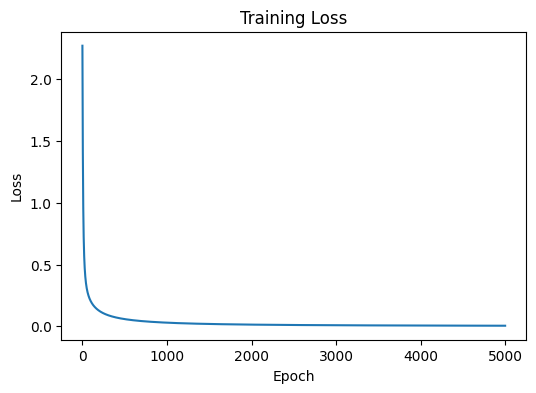

In [ ]:
plt.figure()
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
def predict(X):
    Z1 = X.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1)

In [ ]:
y_pred = predict(X_test)
accuracy = np.mean(y_pred == y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


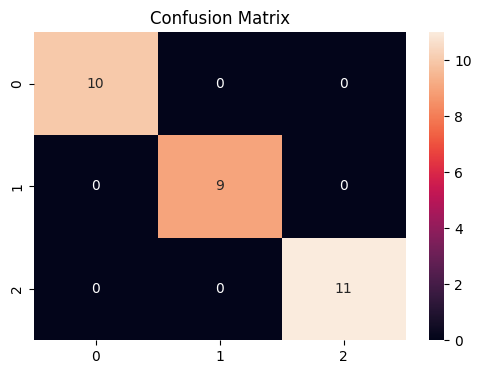

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

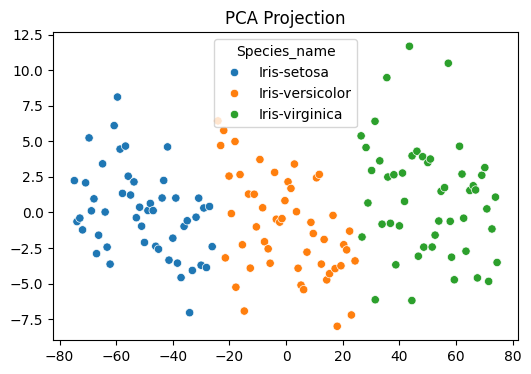

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=df['Species_name'])
plt.title("PCA Projection")
plt.show()